In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Step #2 - Read in csv and display top 5 rows

In [2]:
df_candy = pd.read_csv('data/top_halloween_candy.csv')

df_candy.head(10)

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds
0,Florida,Skittles,660000lbs,Snickers,543529lbs,Reese's Peanut Butter Cups,194117lbs
1,Kansas,M&M's,247500lbs,Reese's Peanut Butter Cups,210375lbs,Dubble Bubble Gum,111375lbs
2,New York,Sour Patch Kids,198016lbs,Candy Corn,95047lbs,Reese's Peanut Butter Cups,39603lbs
3,Washington,Salt Water Taffy,207900lbs,Tootsie Pops,171211lbs,Hershey Kisses,61147lbs
4,California,Assorted Salt Water Taffy,1650000lbs,M&M's,1188000lbs,Skittles,726000lbs
5,District of Columbia,M&M's,26400lbs,Tootsie Pops,18276lbs,Blow Pops,10153lbs
6,Texas,Reese's Peanut Butter Cups,198990lbs,Starburst,187284lbs,Almond Joy,81937lbs
7,Alaska,Twix,5082lbs,Blow Pops,4012lbs,Kit Kat,3209lbs
8,Georgia,Swedish Fish,148731lbs,Hershey Kisses,88136lbs,Lemonheads,38559lbs
9,Missouri,Milky Way,47143lbs,Dubble Bubble Gum,27857lbs,Butterfinger,23571lbs


Step #3 - Unique candies in the top_candy column

In [3]:
df_candy['top_candy'].nunique()

25

In [4]:
df_candy['top_candy'].unique()

array(['Skittles', "M&M's", 'Sour Patch Kids', 'Salt Water Taffy',
       'Assorted Salt Water Taffy', "Reese's Peanut Butter Cups", 'Twix',
       'Swedish Fish', 'Milky Way', 'Butterfinger', 'Hershey Kisses',
       'Snickers', 'Jolly Ranchers Candy', 'Tootsie Pops', 'Blow Pops',
       "Hershey's Mini Chocolate Candy Bars", 'Hot Tamales', 'Candy Corn',
       '3 Musketeers', 'Lemonheads', 'Kit Kat', 'Starburst',
       'Dubble Bubble Gum', 'Life Savers', 'Almond Joy'], dtype=object)

Step #3 - Most appearences in the top_candy column

In [47]:
df_candy.groupby('top_candy')['top_candy'].count().sort_values(ascending = False).head(2)

#I got this wrong as I called .head(1)

top_candy
Candy Corn                    5
Reese's Peanut Butter Cups    5
Name: top_candy, dtype: int64

Step #4 - Remove lbs from the 3 mentioned columns

In [6]:
#For checking before

df_candy.head()

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds
0,Florida,Skittles,660000lbs,Snickers,543529lbs,Reese's Peanut Butter Cups,194117lbs
1,Kansas,M&M's,247500lbs,Reese's Peanut Butter Cups,210375lbs,Dubble Bubble Gum,111375lbs
2,New York,Sour Patch Kids,198016lbs,Candy Corn,95047lbs,Reese's Peanut Butter Cups,39603lbs
3,Washington,Salt Water Taffy,207900lbs,Tootsie Pops,171211lbs,Hershey Kisses,61147lbs
4,California,Assorted Salt Water Taffy,1650000lbs,M&M's,1188000lbs,Skittles,726000lbs


Just to try it, here is a function, I think it could be more efficient, might come back to it if I have time

In [7]:
#df_candy['top_candy_pounds'] = df_candy['top_candy_pounds'].str.extract('(\d+)')

def remove_lbs(dfname, column1, column2, column3): 
    dfname[column1] = dfname[column1].str.extract('(\d+)')
    dfname[column2] = dfname[column2].str.extract('(\d+)')
    dfname[column3] = dfname[column3].str.extract('(\d+)')

In [8]:
remove_lbs(df_candy, 'top_candy_pounds', 'second_place_pounds', 'third_place_pounds')

In [9]:
#For checking before and after

df_candy.head()

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds
0,Florida,Skittles,660000,Snickers,543529,Reese's Peanut Butter Cups,194117
1,Kansas,M&M's,247500,Reese's Peanut Butter Cups,210375,Dubble Bubble Gum,111375
2,New York,Sour Patch Kids,198016,Candy Corn,95047,Reese's Peanut Butter Cups,39603
3,Washington,Salt Water Taffy,207900,Tootsie Pops,171211,Hershey Kisses,61147
4,California,Assorted Salt Water Taffy,1650000,M&M's,1188000,Skittles,726000


Step #4 - Convert the 3 columns to numeric type

In [10]:
def mkint (dfname, column): 
    dfname[column] = dfname[column].astype('int64')

In [11]:
mkint(df_candy, 'top_candy_pounds')
mkint(df_candy, 'second_place_pounds')
mkint(df_candy, 'third_place_pounds')

In [12]:
#Shows changes in datatypes for the requested columns

df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                51 non-null     object
 1   top_candy            51 non-null     object
 2   top_candy_pounds     51 non-null     int64 
 3   second_place         51 non-null     object
 4   second_place_pounds  51 non-null     int64 
 5   third_place          51 non-null     object
 6   third_place_pounds   51 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ KB


Step #5 - Create new column and combine other columns

In [13]:
df_candy['total_pounds'] = df_candy['top_candy_pounds'] + df_candy['second_place_pounds'] + df_candy['third_place_pounds']

In [14]:
#Shows that it worked

df_candy.head()

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds
0,Florida,Skittles,660000,Snickers,543529,Reese's Peanut Butter Cups,194117,1397646
1,Kansas,M&M's,247500,Reese's Peanut Butter Cups,210375,Dubble Bubble Gum,111375,569250
2,New York,Sour Patch Kids,198016,Candy Corn,95047,Reese's Peanut Butter Cups,39603,332666
3,Washington,Salt Water Taffy,207900,Tootsie Pops,171211,Hershey Kisses,61147,440258
4,California,Assorted Salt Water Taffy,1650000,M&M's,1188000,Skittles,726000,3564000


In [15]:
#Prove that the math was correct...even though we know it is, useful with more complicated operations

df_candy.iloc[0,2] + df_candy.iloc[0,4] + df_candy.iloc[0,6]

1397646

Step #6 - Which states consume the MOST of its 1st, 2nd, and 3rd place candies combined? 

In [16]:
#One way to do it

df_candy.sort_values('total_pounds', ascending = False).head(5)

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds
4,California,Assorted Salt Water Taffy,1650000,M&M's,1188000,Skittles,726000,3564000
49,Arizona,Snickers,963971,Hershey Kisses,680450,Hot Tamales Minis,453633,2098054
0,Florida,Skittles,660000,Snickers,543529,Reese's Peanut Butter Cups,194117,1397646
42,Utah,Jolly Ranchers Candy,469590,Reese's Peanut Butter Cups,260883,Tootsie Pops,139137,869610
41,Pennsylvania,Skittles,299442,M&M's,269497,Hershey's Mini Chocolate Candy Bars,104804,673743


In [17]:
#Another way to do it

df_candy.groupby('state')['total_pounds'].sum().sort_values(ascending = False).head(5)

state
California      3564000
Arizona         2098054
Florida         1397646
Utah             869610
Pennsylvania     673743
Name: total_pounds, dtype: int64

Step #6 - Which states consume the LEAST of its 1st, 2nd, and 3rd place candies combined? 

In [18]:
df_candy.groupby('state')['total_pounds'].sum().sort_values().head(5)

state
Connecticut      4895
Alaska          12303
Colorado        12909
Rhode Island    35392
Oklahoma        35592
Name: total_pounds, dtype: int64

Step #7 - Read in population csv

In [19]:
df_pop = pd.read_csv('data/population_est2017.csv')

In [20]:
df_pop.head()

,NAME,POPESTIMATE2017
0,Alabama,4874747
1,Alaska,739795
2,Arizona,7016270
3,Arkansas,3004279
4,California,39536653


Step #7 - Merge population data with candy data

In [21]:
#Rename column so they merge, rename pop column so I don't have to type that out

df_pop.rename(columns = {'NAME' : 'state', 'POPESTIMATE2017': 'pop'}, inplace = True)

In [22]:
#Easy merge

df_candy_pop = df_candy.merge(df_pop, on='state')

In [23]:
#Pop is already an int!

df_candy_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                51 non-null     object
 1   top_candy            51 non-null     object
 2   top_candy_pounds     51 non-null     int64 
 3   second_place         51 non-null     object
 4   second_place_pounds  51 non-null     int64 
 5   third_place          51 non-null     object
 6   third_place_pounds   51 non-null     int64 
 7   total_pounds         51 non-null     int64 
 8   pop                  51 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 4.0+ KB


Step #8 - New column 'per capita' to show the average combined weight of 1st, 2nd, and 3rd place candies consumed per person in each state

In [24]:
df_candy_pop['per_capita'] = df_candy_pop['total_pounds']/df_candy_pop['pop']

In [25]:
df_candy_pop.head()

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds,pop,per_capita
0,Florida,Skittles,660000,Snickers,543529,Reese's Peanut Butter Cups,194117,1397646,20984400,0.066604
1,Kansas,M&M's,247500,Reese's Peanut Butter Cups,210375,Dubble Bubble Gum,111375,569250,2913123,0.195409
2,New York,Sour Patch Kids,198016,Candy Corn,95047,Reese's Peanut Butter Cups,39603,332666,19849399,0.016759
3,Washington,Salt Water Taffy,207900,Tootsie Pops,171211,Hershey Kisses,61147,440258,7405743,0.059448
4,California,Assorted Salt Water Taffy,1650000,M&M's,1188000,Skittles,726000,3564000,39536653,0.090144


Step #9 - Which state has the greatest (combined) consumption of its 1st, 2nd, and 3rd place candies per capita? Which has the least?

In [26]:
#Greatest combined

df_candy_pop.groupby('state')['per_capita'].sum().sort_values(ascending = False).head(5)

state
Hawaii          0.443022
Arizona         0.299027
Utah            0.280354
North Dakota    0.225354
Nevada          0.218144
Name: per_capita, dtype: float64

In [27]:
#Least combined

df_candy_pop.groupby('state')['per_capita'].sum().sort_values().head(5)

state
Connecticut    0.001364
Colorado       0.002302
Oklahoma       0.009054
Maryland       0.012844
Tennessee      0.015591
Name: per_capita, dtype: float64

Step #10 - Create a visualization showing the distribution of 'per capita' values by state.

In [28]:
#Sort by consumption

df_candy_pop.sort_values('per_capita', inplace = True)

[Text(0, 0.5, ''), (0.0, 0.5), Text(0.5, 0, 'Pounds')]

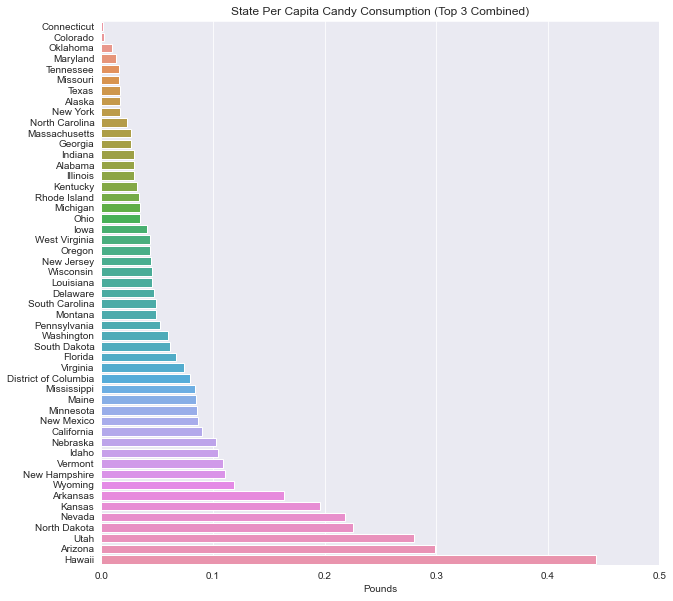

In [29]:
sns.set_style('darkgrid')
sns.set_palette('bright')

fig, ax0 = plt.subplots(figsize = (10,10))

g0 = sns.barplot(x = 'per_capita', y = 'state', 
            data = df_candy_pop, ax = ax0,)

#Created xlim because I think it makes a good reference
#Removed y axis label on purpose because it would be redundant/obvious

ax0.set_title('State Per Capita Candy Consumption (Top 3 Combined)')
ax0.set(xlabel = 'Pounds', ylabel = '', xlim = (0,0.5))

In [30]:
#Alphabetize 

df_candy_pop.sort_values('state', inplace = True)

[Text(0, 0.5, ''), (0.0, 0.5), Text(0.5, 0, 'Pounds')]

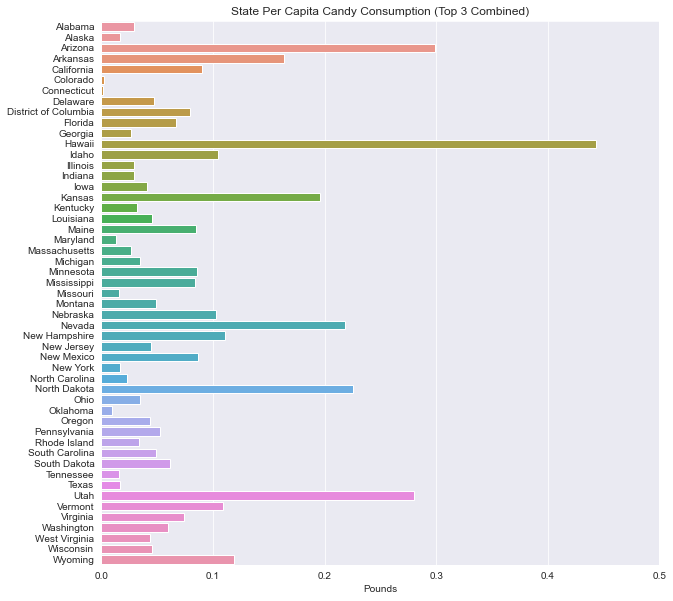

In [31]:
sns.set_style('darkgrid')
sns.set_palette('bright')

fig, ax0 = plt.subplots(figsize = (10,10))

g0 = sns.barplot(x = 'per_capita', y = 'state', 
            data = df_candy_pop, ax = ax0,)

#Created xlim because I think it makes a good reference
#Removed y axis label on purpose because it would be redundant/obvious

ax0.set_title('State Per Capita Candy Consumption (Top 3 Combined)')
ax0.set(xlabel = 'Pounds', ylabel = '', xlim = (0,0.5))

Step #10 - Can you think of any limitations of comparing states using this metric? 

I don't think using per capita candy consumption is all that bad, based on the context of this study. However, there are a few factors we could consider to get a more "true" outlook on candy consumption.

First off, this is slightly flawed since we're looking at only the top 3 candies. It's very possible that only the top 3 candies are statistically significant in that there could be evidence that the vast majority of candy consumers have a favorite and choose not to consume any significant value of other candies. However, we have no evidence of this. 

Secondly, this data tells us nothing of other candies consumed. It's very possible that per capita consumption changes greatly if we are to look at the actual total pounds consumper per capita. It would be interesting to see if certain states place favorites with particularly popular candies while others do not. 

Thirdly, dovetailing on my second point is the data regarding Hawaii. Being that Hawaii most likley has fewer choices in consumption, being more difficult and costly to ship to, it is likely that their skew shown in this data shows evidence towards my second point. Oddly enough, this is the opposite for Alaska. 

Step #11 - Create a visualization to show the top 3 candies for the State of Tennessee

In [32]:
#Set index to make the column .loc searchable

df_candy_pop.set_index('state', inplace = True)

df_candy_pop.loc['Tennessee']

top_candy                  Tootsie Pops
top_candy_pounds                  58740
second_place           Salt Water Taffy
second_place_pounds               33200
third_place                    Skittles
third_place_pounds                12769
total_pounds                     104709
pop                             6715984
per_capita                     0.015591
Name: Tennessee, dtype: object

In [33]:
#Dirty way

df_candy_tn = pd.DataFrame([['Total', 104709], ['Tootsie Pops', 58740], ['Salt Water Taffy', 33200], ['Skittles', 12769]], 
                           columns = ['Candy', 'Pounds'])
df_candy_tn

,Candy,Pounds
0,Total,104709
1,Tootsie Pops,58740
2,Salt Water Taffy,33200
3,Skittles,12769


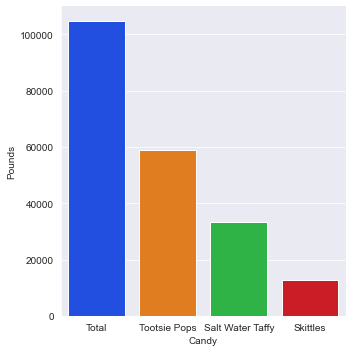

In [34]:
sns.set_style('darkgrid')
sns.set_palette('bright')

g0 = sns.catplot(x = 'Candy', y = 'Pounds', 
            data = df_candy_tn, kind = 'bar')

Step #13 - Find the 5 candies that show up most frequently (1st, 2nd, and 3rd places combined) in the dataset.

In [35]:
df_candy_count = df_candy_pop[['top_candy', 'second_place', 'third_place']].apply(pd.Series.value_counts)

In [36]:
df_candy_count['count'] = df_candy_count.sum(axis = 1)

In [37]:
df_candy_count.groupby(df_candy_count.index)['count'].sum().sort_values(ascending = False).head(5)

M&M's                         16.0
Skittles                      13.0
Reese's Peanut Butter Cups    12.0
Candy Corn                    12.0
Tootsie Pops                   9.0
Name: count, dtype: float64

In [38]:
df_candy_count.sort_values('count', ascending = False, inplace = True)

In [39]:
df_candy_count.head(25)

,top_candy,second_place,third_place,count
M&M's,3.0,8.0,5.0,16.0
Skittles,3.0,4.0,6.0,13.0
Candy Corn,5.0,3.0,4.0,12.0
Reese's Peanut Butter Cups,5.0,4.0,3.0,12.0
Tootsie Pops,3.0,3.0,3.0,9.0
Starburst,2.0,4.0,2.0,8.0
Snickers,2.0,4.0,2.0,8.0
Milky Way,3.0,3.0,2.0,8.0
Butterfinger,2.0,1.0,4.0,7.0
Sour Patch Kids,3.0,2.0,1.0,6.0


Step #13 - Create a bar plot to show the number of times these five candies appear in the dataset

[Text(0, 0.5, ''), Text(0.5, 0, 'Number of Times Candy Occured in Top 3')]

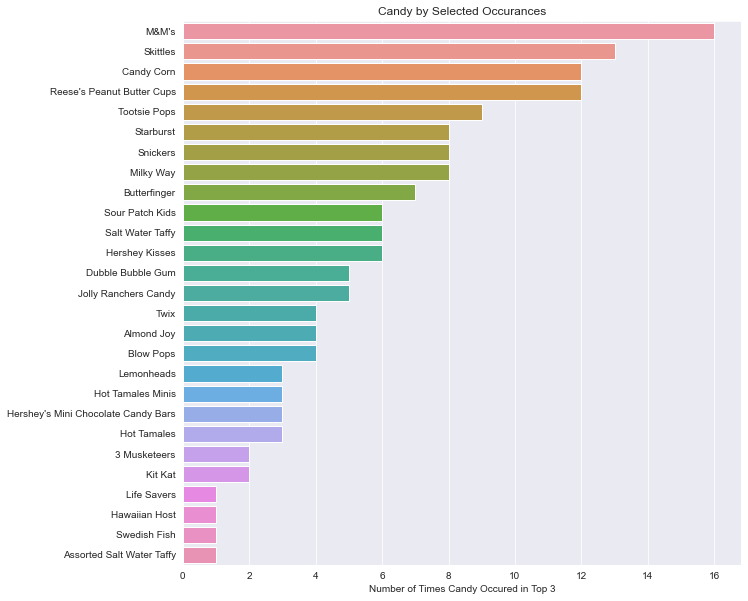

In [40]:
sns.set_style('darkgrid')
sns.set_palette('bright')

fig, ax0 = plt.subplots(figsize = (10,10))

g0 = sns.barplot(x = 'count', y = df_candy_count.index, 
            data = df_candy_count, ax = ax0,)

#Created xlim because I think it makes a good reference
#Removed y axis label on purpose because it would be redundant/obvious

ax0.set_title('Candy by Selected Occurances')
ax0.set(xlabel = 'Number of Times Candy Occured in Top 3', ylabel = '')

Step #14 - Find all unique candies, those that appear in the state's top-3 list but do not appear in any other state's list. Report both the candy name and the state in whose list is appears. 

In [41]:
df_candy_count['count'] == 1.0

M&M's                                  False
Skittles                               False
Candy Corn                             False
Reese's Peanut Butter Cups             False
Tootsie Pops                           False
Starburst                              False
Snickers                               False
Milky Way                              False
Butterfinger                           False
Sour Patch Kids                        False
Salt Water Taffy                       False
Hershey Kisses                         False
Dubble Bubble Gum                      False
Jolly Ranchers Candy                   False
Twix                                   False
Almond Joy                             False
Blow Pops                              False
Lemonheads                             False
Hot Tamales Minis                      False
Hershey's Mini Chocolate Candy Bars    False
Hot Tamales                            False
3 Musketeers                           False
Kit Kat   

In [42]:
print(df_candy_pop[df_candy_pop['top_candy'].str.contains('Life Savers') |
            df_candy_pop['second_place'].str.contains('Life Savers') |
            df_candy_pop['third_place'].str.contains('Life Savers')])

            top_candy  top_candy_pounds second_place  second_place_pounds  \
state                                                                       
Delaware  Life Savers             19905     Skittles                17061   

         third_place  third_place_pounds  total_pounds     pop  per_capita  
state                                                                       
Delaware  Candy Corn                8530         45496  961939    0.047296  


In [43]:
print(df_candy_pop[df_candy_pop['top_candy'].str.contains('Hawaiian Host') |
            df_candy_pop['second_place'].str.contains('Hawaiian Host') |
            df_candy_pop['third_place'].str.contains('Hawaiian Host')])

             top_candy  top_candy_pounds   second_place  second_place_pounds  \
state                                                                          
Hawaii  Hershey Kisses            271042  Hawaiian Host               255984   

       third_place  third_place_pounds  total_pounds      pop  per_capita  
state                                                                      
Hawaii   Milky Way              105405        632431  1427538    0.443022  


In [44]:
print(df_candy_pop[df_candy_pop['top_candy'].str.contains('Swedish Fish') |
            df_candy_pop['second_place'].str.contains('Swedish Fish') |
            df_candy_pop['third_place'].str.contains('Swedish Fish')])

            top_candy  top_candy_pounds    second_place  second_place_pounds  \
state                                                                          
Georgia  Swedish Fish            148731  Hershey Kisses                88136   

        third_place  third_place_pounds  total_pounds       pop  per_capita  
state                                                                        
Georgia  Lemonheads               38559        275426  10429379    0.026409  


In [45]:
print(df_candy_pop[df_candy_pop['top_candy'].str.contains('Assorted Salt Water Taffy') |
            df_candy_pop['second_place'].str.contains('Assorted Salt Water Taffy') |
            df_candy_pop['third_place'].str.contains('Assorted Salt Water Taffy')])

                            top_candy  top_candy_pounds second_place  \
state                                                                  
California  Assorted Salt Water Taffy           1650000        M&M's   

            second_place_pounds third_place  third_place_pounds  total_pounds  \
state                                                                           
California              1188000    Skittles              726000       3564000   

                 pop  per_capita  
state                             
California  39536653    0.090144  
